In [29]:
from scipy import stats
import matplotlib.pyplot as plt
from env import get_connection
from sqlalchemy import text, create_engine
from pydataset import data
import pandas as pd
import numpy as np

1) A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. 

Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

In [30]:
cars = stats.poisson(2)
x = np.arange(0,11)

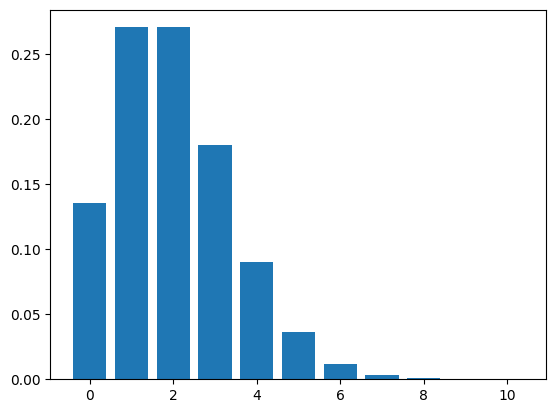

In [31]:
plt.bar(x, cars.pmf(x))
plt.show()

a) What is the probability that no cars drive up in the noon hour?

In [32]:
cars.pmf(0)

0.1353352832366127

In [33]:
x = np.arange(0, 10)
y = cars.pmf(x)

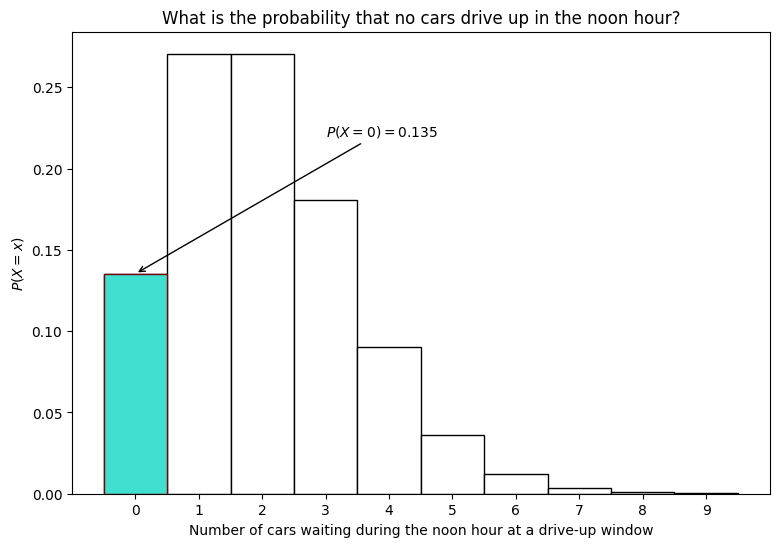

In [34]:
plt.figure(figsize=(9, 6))
plt.bar(
    x, 
    y, 
    edgecolor='black', 
    color='white', 
    width=1
)
plt.xticks(x)
plt.ylabel('$P(X = x)$')
plt.xlabel('Number of cars waiting during the noon hour at a drive-up window')
plt.title('What is the probability that no cars drive up in the noon hour?')
plt.bar(
    0, 
    cars.pmf(0), 
    width=1, 
    color='turquoise', 
    edgecolor='maroon'
)
plt.annotate(
    f'$P(X = 0) = {cars.pmf(0):.3f}$', 
    (0, stats.poisson(2).pmf(0)), 
    xytext=(3, .22), 
    arrowprops={'arrowstyle': '->'}
)
plt.show()

b) What is the probability that 3 or more cars come through the drive through?

In [35]:
cars.sf(2)

0.32332358381693654

In [36]:
x = np.arange(0, 10)
y = y = stats.poisson(2).pmf(x)

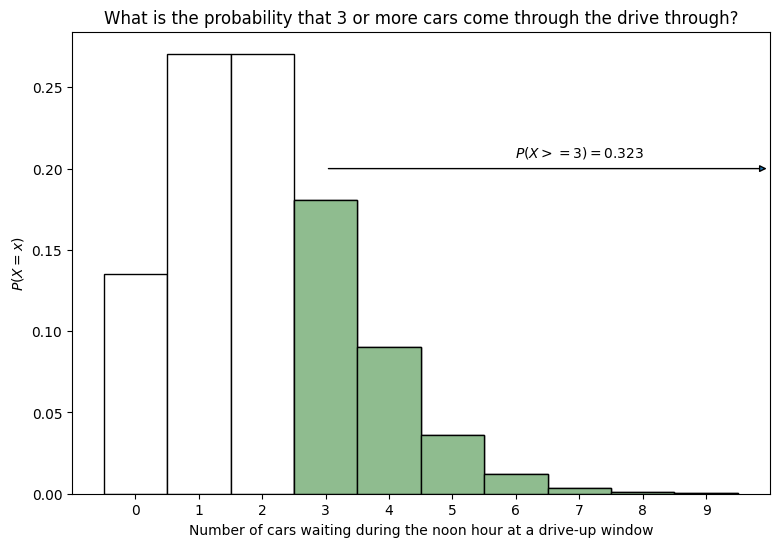

In [37]:
plt.figure(figsize=(9, 6))
plt.bar(x, y, edgecolor='black', color='white', width=1)
plt.xticks(x)
plt.ylabel('$P(X = x)$')
plt.xlabel('Number of cars waiting during the noon hour at a drive-up window')
plt.title('What is the probability that 3 or more cars come through the drive through?')

x1 = np.arange(3, 10)
y1 = cars.pmf(x1)

plt.bar(x1, y1, width=1, color='darkseagreen', edgecolor='black')

plt.annotate('', xy=(3, .20), xytext=(10, .20), xycoords='data', textcoords='data', arrowprops={'arrowstyle': '<|-'})
plt.text(7, .21, f'$P(X >= 3) = {cars.sf(2):.3f}$', va='center', ha='center')
plt.show()

c) How likely is it that the drive through gets at least 1 car?

In [38]:
cars.sf(0)

0.8646647167633873

2) Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

a) What grade point average is required to be in the top 5% of the graduating class?

In [39]:
grades = stats.norm(3, 0.3)

In [40]:
grades.isf(0.05)

3.4934560880854417

b) What GPA constitutes the bottom 15% of the class?

In [41]:
grades.ppf(0.15)

2.689069983151863

c) An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 

Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [42]:
grades.ppf(2/10)

2.7475136299281258

In [43]:
grades.ppf(3/10)

2.842679846187588

In [44]:
[grades.ppf(n/10) for n in [2,3]]

[2.7475136299281258, 2.842679846187588]

range of the 3rd decile is 2.7 to 2.8, so 2.8 gpa would qualify.

d) If I have a GPA of 3.5, what percentile am I in?

In [45]:
grades.cdf(3.5)

0.9522096477271853

95th percentile

3) A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. 

How likely is it that this many people or more click through?

In [46]:
click_rate = stats.norm(0.02)

In [47]:
cur_day_perc = 97/4326

In [48]:
click_rate.sf(cur_day_perc)

0.4990335388328442

4) You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. 

Looking to save time, you put down random probabilities as the answer to each question

-What is the probability that at least one of your first 60 answers is correct?

In [49]:
questions = stats.binom(60, 0.01)

In [50]:
all_wrong = questions.pmf(0)

In [51]:
1 - all_wrong

0.4528433576092388

5) The codeup staff tends to get upset when the student break area is not cleaned up. 

a) Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? 

In [52]:
num_of_students = 22 * 3

In [53]:
num_of_breakroom_students = round((90/100) * num_of_students)
num_of_breakroom_students

59

In [54]:
break_room_cleaning = stats.binom(num_of_breakroom_students, 0.03)

In [55]:
1 - break_room_cleaning.pmf(0)

0.8342199288437352

b) How likely is it that it goes two days without getting cleaned up? 

In [56]:
break_room_cleaning_2days = num_of_breakroom_students * 2

In [57]:
break_room = stats.binom(break_room_cleaning_2days, 0.03)

In [58]:
break_room.pmf(0)

0.02748303199257624

All week?

In [59]:
break_room_cleaning.pmf(0) * 5

0.8289003557813239

6) You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. 

After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. 

If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class?

Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [60]:
ppl_in_line = stats.norm(15, 3)

In [61]:
ppl_in_line.cdf(16.5)

0.6914624612740131

7) Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [62]:
def get_db_url(database):
    return get_connection(database)

In [63]:
url = get_db_url('employees')

In [64]:
engine =  create_engine(url)

In [65]:
query = '''
        SELECT *
        FROM salaries
        WHERE to_date > curdate()
        '''

In [66]:
text_query = text(query)

In [67]:
df = pd.read_sql(text(query), engine.connect())
df.head(10)

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
5,10006,59755,2001-08-02,9999-01-01
6,10007,88070,2002-02-07,9999-01-01
7,10009,94409,2002-02-14,9999-01-01
8,10010,80324,2001-11-23,9999-01-01
9,10012,54423,2001-12-16,9999-01-01


In [68]:
emp_avg_sal = df.salary.mean()
emp_avg_sal

72012.23585730705

In [69]:
emp_std_sal = df.salary.std()

a) What percent of employees earn less than 60,000?

In [70]:
emp = stats.norm(emp_avg_sal, emp_std_sal)

In [71]:
emp.cdf(60_000)

0.24385742480214506

b) What percent of employees earn more than 95,000?

In [72]:
emp.sf(95_000)

0.0920881919980413

c) What percent of employees earn between 65,000 and 80,000?

In [73]:
[emp.cdf(n) for n in [65_000, 80_000]]

[0.342702921950652, 0.6777634904953175]

d) What do the top 5% of employees make?

In [74]:
emp.isf(0.05)

100484.64454102787

In [75]:
len(df.salary) * 0.05

12006.2